<a href="https://colab.research.google.com/github/Sloba98/Laundry-Image-Classification/blob/restnet-base_model/RestNet_50_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch
from torch import nn
from torch import optim
from torchvision import models, transforms
from torchvision.models import ResNet50_Weights
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder


In [5]:
from PIL import Image
from torchvision import transforms

In [6]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

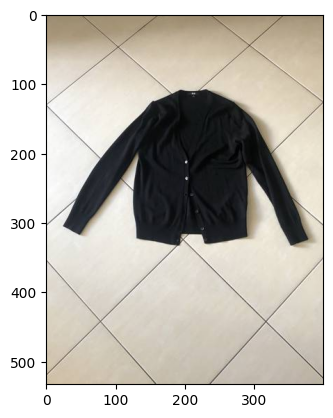

In [7]:
path = '/content/drive/MyDrive/Colab Notebooks/Laundry-Image-Classification-main/inputs/train/longsleeve/00588f87-cda1-46d7-93be-71f0fa889895.jpg'
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

In [8]:
class ImageNetPreprocessing(nn.Module):
    def __init__(self):
        super(ImageNetPreprocessing, self).__init__()
        self.mean = torch.tensor([0.485, 0.456, 0.406])
        self.std = torch.tensor([0.229, 0.224, 0.225])

    def forward(self, x):
        mean = self.mean.to(x.device)
        std = self.std.to(x.device)

        x = x[:, [2, 1, 0], :, :]  # Convert RGB to BGR
        x = (x - mean[None, :, None, None]) / std[None, :, None, None]
        return x

In [9]:
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    correct = (preds == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [10]:
resnet = models.resnet50(pretrained=True)
for param in resnet.parameters():
    param.requires_grad = False
num_classes = 10
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet.to(device)

learning_rate = 0.001
optimizer = optim.Adam(resnet.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 157MB/s]


In [11]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Colab Notebooks/Laundry-Image-Classification-main/inputs/train', transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

In [14]:
train_losses = []
train_accuracy = []
num_epochs = 10
for epoch in range(num_epochs):

    resnet.train()

    running_loss = 0.0
    running_accuracy = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accuracy = calculate_accuracy(outputs, labels)
        running_loss += loss.item()
        running_accuracy += accuracy
        print(accuracy)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_accuracy / len(train_loader)
    train_losses.append(loss)
    train_accuracy.append(accuracy)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

0.4375
0.625
0.6875
0.59375
0.6875
0.5625
0.53125
0.59375
0.625
0.5
0.625
0.5
0.4375
0.59375
0.6875
0.59375
0.5625
0.625
0.625
0.65625
0.78125
0.8125
0.65625
0.625
0.53125
0.71875
0.65625
0.6875
0.6875
0.5
0.5
0.59375
0.8125
0.53125
0.65625
0.78125
0.6875
0.71875
0.65625
0.8125
0.59375
0.6875
0.75
0.75
0.59375
0.59375
0.5
0.625
0.75
0.75
0.625
0.78125
0.75
0.71875
0.78125
0.8125
0.71875
0.75
0.75
0.875
0.59375
0.59375
0.59375
0.8125
0.5
0.71875
0.78125
0.8125
0.6875
0.875
0.78125
0.71875
0.71875
0.71875
0.53125
0.9375
0.875
0.71875
0.65625
0.65625
0.6875
0.71875
0.59375
0.6875
0.65625
0.71875
0.8125
0.78125
0.8125
0.625
0.71875
0.59375
0.71875
0.59375
0.78125
0.75
Epoch 1, Loss: 1.0656, Accuracy: 0.6755
0.8125
0.65625
0.71875
0.84375
0.84375
0.78125
0.8125
0.8125
0.8125
0.75
0.8125
0.78125
0.71875
0.78125
0.78125
0.78125
0.71875
0.75
0.8125
0.6875
0.71875
0.78125
0.8125
0.78125
0.84375
0.875
0.8125
0.78125
0.8125
0.78125
0.84375
0.625
0.78125
0.75
0.78125
0.75
0.84375
0.75
0.6875
0.687

Accuracy u poslednjoj epohi: 0.8928571428571429


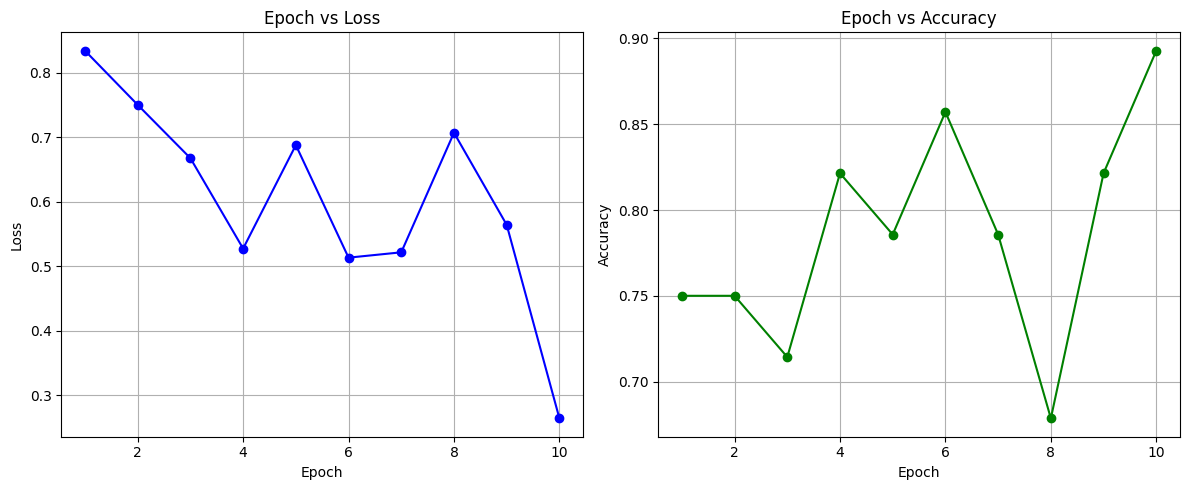

In [15]:
train_losses = [loss.cpu().item() if isinstance(loss, torch.Tensor) else loss for loss in train_losses]

train_accuracy = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in train_accuracy]

print(f"Accuracy u poslednjoj epohi: {train_accuracy[-1]}")
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', color='b')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy, marker='o', color='g')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()